## Web Scraping for Indeed.com 

#### Hello~ I'm Tako. I am an aspiring data analyst with a strong background in qualitative communication research. The transition to data science from a purely qualitative field has been a wild ride but I sincerely love the challenges. Here is my first project and I'm very proud because I finished it with very minimum help of the others. 

#### This project showcases two major skills. 1. Collect unstructured data by web scraping a website 2. Visualization of the result \
Since I'm going into data science, I want to know what is most the fundamental skills I need to acquire before applying for a job position. I chose Indeed.com and scraped the top 200 Data Scientist job required skills in 7 cities (Los Angeles, Boston, Austin, Chicago, San Francisco, DC and New York). Then I used matplotlib to graph the frequency of each required programming languages. 

Step 1: Set up a request to the URL Indeed.com/m/. Then use BeautifulSoup to parse the page. 

In [1]:
#Import all the packages needed

from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
from urllib.request import urlopen
import lxml
import matplotlib.pyplot

In [2]:
max_result_per_city = 20
cities = []
title = []
company = []
location = []
jd = []
for city in set(['Los+Angeles', 'New+York', 'San+Francisco', 'Chicago', 'Boston', 'Austin', 'DC']):
    
    url = "https://www.indeed.com/m/jobs?q=data+scientist&l=" + str(city)
    print(city)
    
    for i in range(0, max_result_per_city):
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs={'rel':['nofollow']})
        for each in all_matches:
            jd_url= 'http://www.indeed.com/m/'+ each['href']
            jd_page =urlopen(jd_url)
            jd_soup = BeautifulSoup(jd_page, 'lxml')
            jd_desc = jd_soup.findAll(attrs={'id':['desc']})
            cities.append(city)
            title.append(jd_soup.body.p.b.font.text)
            company.append(jd_desc[0].span.text)
            location.append(jd_soup.body.p.span.text)
            jd.append(jd_desc[0].text)
        
        url = 'http://www.indeed.com/m/jobs?q=data+scientist&l='+ str(city) + '&start=' + str((i+1)*10)
        print(url)


Los+Angeles
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=10
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=20
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=30
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=40
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=50
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=60
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=70
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=80
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=90
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=100
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=110
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=120
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=130
http://www.indeed.com/m/jobs?q=data+scientist&l=Los+Angeles&start=140
http://www.indeed

Step 2: Create a dataframe to store all the information 

In [6]:
job = {'cities': cities,'title': title,
         'company': company,
         'location': location,
         'Job_Description': jd}
df = pd.DataFrame.from_dict(job)


In [7]:
df

,cities,title,company,location,Job_Description
0,Los+Angeles,Data Scientist,Deloitte,"Los Angeles, CA 90013",Deloitte Services LP includes internal support...
1,Los+Angeles,Data Scientist I - (Part-time),"Columbus Technologies and Services, Inc.","Pasadena, CA 91101",Must be a US Citizen\nEstimated duration of 12...
2,Los+Angeles,Data Scientist,AvantStay,"Los Angeles, CA","Who we are...\nAvantStay delivers exceptional,..."
3,Los+Angeles,Data Scientist,Age of Learning,"Glendale, CA 91203",Company Overview:\nAge of Learning is a leadin...
4,Los+Angeles,Data Scientist,NBCUniversal,"Beverly Hills, CA","Fandango is seeking a driven, analytically cur..."
5,Los+Angeles,Data Scientist,GOAT,"Los Angeles, CA","With over 20 million members, GOAT is the worl..."
6,Los+Angeles,Data Scientist,Cognizant,"Burbank, CA",We continuously seek exceptional associates wh...
7,Los+Angeles,Data Scientist Population Health,"Martin Luther King, Jr. Community Hospital","Los Angeles, CA 90059",Under the guidance of the Manager of Data Scie...
8,Los+Angeles,Data Scientist III,"Columbus Technologies and Services, Inc.","Pasadena, CA 91101",Must be a Green Card Holder\nEstimated duratio...
9,Los+Angeles,Data Scientist (Analytics),Opendoor,"Los Angeles, CA","In 2014, we set out to reinvent life’s most im..."


Step 3: Since I only want 200 entries, I slice the dataframe according to the city

In [11]:
SF = df[df.cities == 'San+Francisco']
LA = df[df.cities == 'Los+Angeles']
BOS = df[df.cities == 'Boston']
DC = df[df.cities == 'DC']
NY = df[df.cities == 'New+York']
AUS = df[df.cities == 'Austin']
CHI = df[df.cities == 'Chicago']

print(SF)
print(LA)
print(BOS)
print(DC)
print(NY)
print(AUS)
print(CHI)

            cities                                              title  \
600  San+Francisco                                     Data Scientist   
601  San+Francisco                                     Data Scientist   
602  San+Francisco                    Measurement Data Scientist (SF)   
603  San+Francisco                  Data Scientist (Jr. to Sr. Level)   
604  San+Francisco                                     Data Scientist   
605  San+Francisco                                     Data Scientist   
606  San+Francisco                                     Data Scientist   
607  San+Francisco                                     Data Scientist   
608  San+Francisco                                     Data Scientist   
609  San+Francisco                                     Data Scientist   
610  San+Francisco                           Principal Data Scientist   
611  San+Francisco                                     Data Scientist   
612  San+Francisco                            Data 

Step 3: Find the Key word (C, C++, Java, Javascript, Python, R, SQL, Hadoop, Hive, Pig, Spark, AWS and Tableau)


#### Los Angeles Frequency

In [12]:
#Find out the frequency of each skills for LA

freq_Python = LA.Job_Description.str.contains(r'Python|python|PYTHON').sum()
freq_Java = LA.Job_Description.str.contains(r'Java|JAVA|java').sum()
freq_hadoop = LA.Job_Description.str.contains(r'[Hh]adoop').sum()
freq_cplus = LA.Job_Description.str.contains(r'C\+\+').sum()
freq_hive = LA.Job_Description.str.contains(r'[Hh]ive').sum()
freq_spark = LA.Job_Description.str.contains(r'[Ss]park').sum()
freq_aws = LA.Job_Description.str.contains(r'AWS').sum()
freq_tableau = LA.Job_Description.str.contains(r'[Tt]ableau').sum()
freq_sql = LA.Job_Description.str.contains(r'SQL|sql').sum()
freq_pig = LA.Job_Description.str.contains(r'[Pp]ig').sum()
freq_c = LA.Job_Description.str.contains(r'\bC(?!.)\b').sum()
freq_r = LA.Job_Description.str.contains(r'\s[Rr]\s|\s[Rr]\.').sum()
freq_javascript = LA.Job_Description.str.contains(r'[Jj]avascript').sum()

In [13]:
#Create Table
from pandas import DataFrame

freq_table = {'Skill': ['Python', 'Java', 'Hadoop', 'C++', 'Hive', 'Spark', 'AWS', 'Tableau', 'SQL', 'Pig', 'C', 'R', 'Javascript'], 
              'LA_Frequency' : [freq_Python, freq_Java, freq_hadoop, freq_cplus, freq_hive, freq_spark, freq_aws,freq_tableau, freq_sql,freq_pig, freq_c, freq_r, freq_javascript]}
LA_table = DataFrame(freq_table, columns = ['Skill', 'LA_Frequency'])
print(LA_table)


         Skill  LA_Frequency
0       Python           144
1         Java            47
2       Hadoop            33
3          C++            28
4         Hive            12
5        Spark            43
6          AWS            30
7      Tableau            49
8          SQL           116
9          Pig             2
10           C             0
11           R            47
12  Javascript             3


#### Boston Frequency

In [14]:
#Find the frequency
freq_Python = BOS.Job_Description.str.contains(r'Python|python|PYTHON').sum()
freq_Java = BOS.Job_Description.str.contains(r'Java|JAVA|java').sum()
freq_hadoop = BOS.Job_Description.str.contains(r'[Hh]adoop').sum()
freq_cplus = BOS.Job_Description.str.contains(r'C\+\+').sum()
freq_hive = BOS.Job_Description.str.contains(r'[Hh]ive').sum()
freq_spark = BOS.Job_Description.str.contains(r'[Ss]park').sum()
freq_aws = BOS.Job_Description.str.contains(r'AWS').sum()
freq_tableau = BOS.Job_Description.str.contains(r'[Tt]ableau').sum()
freq_sql = BOS.Job_Description.str.contains(r'SQL|sql').sum()
freq_pig = BOS.Job_Description.str.contains(r'[Pp]ig').sum()
freq_c = BOS.Job_Description.str.contains(r'\bC(?!.)\b').sum()
freq_r = BOS.Job_Description.str.contains(r'\s[Rr]\s|\s[Rr]\.').sum()
freq_javascript = BOS.Job_Description.str.contains(r'[Jj]avascript').sum()

In [15]:
#Create Table
from pandas import DataFrame

freq_table = {'Skill': ['Python', 'Java', 'Hadoop', 'C++', 'Hive', 'Spark', 'AWS', 'Tableau', 'SQL', 'Pig', 'C', 'R', 'Javascript'], 
              'BOS_Frequency' : [freq_Python, freq_Java, freq_hadoop, freq_cplus, freq_hive, freq_spark, freq_aws,freq_tableau, freq_sql,freq_pig, freq_c, freq_r, freq_javascript]}
BOS_table = DataFrame(freq_table, columns = ['Skill', 'BOS_Frequency'])
print(BOS_table)

         Skill  BOS_Frequency
0       Python            142
1         Java             31
2       Hadoop             21
3          C++             21
4         Hive             13
5        Spark             26
6          AWS             28
7      Tableau             32
8          SQL             95
9          Pig              6
10           C              0
11           R             27
12  Javascript              3


#### San Francisco Frequency

In [16]:
#Find the frequency
freq_Python = SF.Job_Description.str.contains(r'Python|python|PYTHON').sum()
freq_Java = SF.Job_Description.str.contains(r'Java|JAVA|java').sum()
freq_hadoop = SF.Job_Description.str.contains(r'[Hh]adoop').sum()
freq_cplus = SF.Job_Description.str.contains(r'C\+\+').sum()
freq_hive = SF.Job_Description.str.contains(r'[Hh]ive').sum()
freq_spark = SF.Job_Description.str.contains(r'[Ss]park').sum()
freq_aws = SF.Job_Description.str.contains(r'AWS').sum()
freq_tableau = SF.Job_Description.str.contains(r'[Tt]ableau').sum()
freq_sql = SF.Job_Description.str.contains(r'SQL|sql').sum()
freq_pig = SF.Job_Description.str.contains(r'[Pp]ig').sum()
freq_c = SF.Job_Description.str.contains(r'\bC(?!.)\b').sum()
freq_r = SF.Job_Description.str.contains(r'\s[Rr]\s|\s[Rr]\.').sum()
freq_javascript = SF.Job_Description.str.contains(r'[Jj]avascript').sum()

In [17]:
#Create Table
from pandas import DataFrame

freq_table = {'Skill': ['Python', 'Java', 'Hadoop', 'C++', 'Hive', 'Spark', 'AWS', 'Tableau', 'SQL', 'Pig', 'C', 'R', 'Javascript'], 
              'SF_Frequency' : [freq_Python, freq_Java, freq_hadoop, freq_cplus, freq_hive, freq_spark, freq_aws,freq_tableau, freq_sql,freq_pig, freq_c, freq_r, freq_javascript]}
SF_table = DataFrame(freq_table, columns = ['Skill', 'SF_Frequency'])
print(SF_table)

         Skill  SF_Frequency
0       Python           148
1         Java            33
2       Hadoop            39
3          C++            13
4         Hive            29
5        Spark            53
6          AWS            21
7      Tableau            30
8          SQL           111
9          Pig             7
10           C             0
11           R            37
12  Javascript             4


#### Chicago Frequency

In [18]:
#Find the frequency
freq_Python = CHI.Job_Description.str.contains(r'Python|python|PYTHON').sum()
freq_Java = CHI.Job_Description.str.contains(r'Java|JAVA|java').sum()
freq_hadoop = CHI.Job_Description.str.contains(r'[Hh]adoop').sum()
freq_cplus = CHI.Job_Description.str.contains(r'C\+\+').sum()
freq_hive = CHI.Job_Description.str.contains(r'[Hh]ive').sum()
freq_spark = CHI.Job_Description.str.contains(r'[Ss]park').sum()
freq_aws = CHI.Job_Description.str.contains(r'AWS').sum()
freq_tableau = CHI.Job_Description.str.contains(r'[Tt]ableau').sum()
freq_sql = CHI.Job_Description.str.contains(r'SQL|sql').sum()
freq_pig = CHI.Job_Description.str.contains(r'[Pp]ig').sum()
freq_c = CHI.Job_Description.str.contains(r'\bC(?!.)\b').sum()
freq_r = CHI.Job_Description.str.contains(r'\s[Rr]\s|\s[Rr]\.').sum()
freq_javascript = CHI.Job_Description.str.contains(r'[Jj]avascript').sum()

In [19]:
#Create Table
from pandas import DataFrame

freq_table = {'Skill': ['Python', 'Java', 'Hadoop', 'C++', 'Hive', 'Spark', 'AWS', 'Tableau', 'SQL', 'Pig', 'C', 'R', 'Javascript'], 
              'CHI_Frequency' : [freq_Python, freq_Java, freq_hadoop, freq_cplus, freq_hive, freq_spark, freq_aws,freq_tableau, freq_sql,freq_pig, freq_c, freq_r, freq_javascript]}
CHI_table = DataFrame(freq_table, columns = ['Skill', 'CHI_Frequency'])
print(CHI_table)

         Skill  CHI_Frequency
0       Python            146
1         Java             26
2       Hadoop             45
3          C++             25
4         Hive             21
5        Spark             44
6          AWS             37
7      Tableau             38
8          SQL            103
9          Pig              7
10           C              1
11           R             43
12  Javascript              1


#### New York Frequency

In [20]:
#Find out the frequency of each skills on JD
freq_Python = NY.Job_Description.str.contains(r'Python|python|PYTHON').sum()
freq_Java = NY.Job_Description.str.contains(r'Java|JAVA|java').sum()
freq_hadoop = NY.Job_Description.str.contains(r'[Hh]adoop').sum()
freq_cplus = NY.Job_Description.str.contains(r'C\+\+').sum()
freq_hive = NY.Job_Description.str.contains(r'[Hh]ive').sum()
freq_spark = NY.Job_Description.str.contains(r'[Ss]park').sum()
freq_aws = NY.Job_Description.str.contains(r'AWS').sum()
freq_tableau = NY.Job_Description.str.contains(r'[Tt]ableau').sum()
freq_sql = df.Job_Description.str.contains(r'SQL|sql').sum()
freq_pig = df.Job_Description.str.contains(r'[Pp]ig').sum()
freq_c = df.Job_Description.str.contains(r'\bC(?!.)\b').sum()
freq_r = df.Job_Description.str.contains(r'\s[Rr]\s|\s[Rr]\.').sum()
freq_javascript = df.Job_Description.str.contains(r'[Jj]avascript').sum()

In [21]:
#Create Table
from pandas import DataFrame

freq_table = {'Skill': ['Python', 'Java', 'Hadoop', 'C++', 'Hive', 'Spark', 'AWS', 'Tableau', 'SQL', 'Pig', 'C', 'R', 'Javascript'], 
              'NY_Frequency' : [freq_Python, freq_Java, freq_hadoop, freq_cplus, freq_hive, freq_spark, freq_aws,freq_tableau, freq_sql,freq_pig, freq_c, freq_r, freq_javascript]}
NY_table = DataFrame(freq_table, columns = ['Skill', 'NY_Frequency'])
print(NY_table)

         Skill  NY_Frequency
0       Python           170
1         Java            56
2       Hadoop            35
3          C++            15
4         Hive            27
5        Spark            52
6          AWS            22
7      Tableau            44
8          SQL           754
9          Pig            46
10           C             1
11           R           270
12  Javascript            27


#### DC Frequency

In [22]:
#Find out the frequency of each skills on JD
freq_Python = DC.Job_Description.str.contains(r'Python|python|PYTHON').sum()
freq_Java = DC.Job_Description.str.contains(r'Java|JAVA|java').sum()
freq_hadoop = DC.Job_Description.str.contains(r'[Hh]adoop').sum()
freq_cplus = DC.Job_Description.str.contains(r'C\+\+').sum()
freq_hive = DC.Job_Description.str.contains(r'[Hh]ive').sum()
freq_spark = DC.Job_Description.str.contains(r'[Ss]park').sum()
freq_aws = DC.Job_Description.str.contains(r'AWS').sum()
freq_tableau = DC.Job_Description.str.contains(r'[Tt]ableau').sum()
freq_sql = DC.Job_Description.str.contains(r'SQL|sql').sum()
freq_pig = DC.Job_Description.str.contains(r'[Pp]ig').sum()
freq_c = DC.Job_Description.str.contains(r'\bC(?!.)\b').sum()
freq_r = DC.Job_Description.str.contains(r'\s[Rr]\s|\s[Rr]\.').sum()
freq_javascript = DC.Job_Description.str.contains(r'[Jj]avascript').sum()

In [23]:
#Create Table
from pandas import DataFrame

freq_table = {'Skill': ['Python', 'Java', 'Hadoop', 'C++', 'Hive', 'Spark', 'AWS', 'Tableau', 'SQL', 'Pig', 'C', 'R', 'Javascript'], 
              'DC_Frequency' : [freq_Python, freq_Java, freq_hadoop, freq_cplus, freq_hive, freq_spark, freq_aws,freq_tableau, freq_sql,freq_pig, freq_c, freq_r, freq_javascript]}
DC_table = DataFrame(freq_table, columns = ['Skill', 'DC_Frequency'])
print(DC_table)

         Skill  DC_Frequency
0       Python           121
1         Java            35
2       Hadoop            24
3          C++            18
4         Hive            12
5        Spark            28
6          AWS            38
7      Tableau            48
8          SQL            94
9          Pig            10
10           C             0
11           R            46
12  Javascript             2


#### Austin Frequency

In [24]:
#Find out the frequency of each skills on JD
freq_Python = AUS.Job_Description.str.contains(r'Python|python|PYTHON').sum()
freq_Java = AUS.Job_Description.str.contains(r'Java|JAVA|java').sum()
freq_hadoop = AUS.Job_Description.str.contains(r'[Hh]adoop').sum()
freq_cplus = AUS.Job_Description.str.contains(r'C\+\+').sum()
freq_hive = AUS.Job_Description.str.contains(r'[Hh]ive').sum()
freq_spark = AUS.Job_Description.str.contains(r'[Ss]park').sum()
freq_aws = AUS.Job_Description.str.contains(r'AWS').sum()
freq_tableau = AUS.Job_Description.str.contains(r'[Tt]ableau').sum()
freq_sql = AUS.Job_Description.str.contains(r'SQL|sql').sum()
freq_pig = AUS.Job_Description.str.contains(r'[Pp]ig').sum()
freq_c = AUS.Job_Description.str.contains(r'\bC(?!.)\b').sum()
freq_r = AUS.Job_Description.str.contains(r'\s[Rr]\s|\s[Rr]\.').sum()
freq_javascript = AUS.Job_Description.str.contains(r'[Jj]avascript').sum()

In [25]:
#Create Table
from pandas import DataFrame

freq_table = {'Skill': ['Python', 'Java', 'Hadoop', 'C++', 'Hive', 'Spark', 'AWS', 'Tableau', 'SQL', 'Pig', 'C', 'R', 'Javascript'], 
              'AUS_Frequency' : [freq_Python, freq_Java, freq_hadoop, freq_cplus, freq_hive, freq_spark, freq_aws,freq_tableau, freq_sql,freq_pig, freq_c, freq_r, freq_javascript]}
AUS_table = DataFrame(freq_table, columns = ['Skill', 'AUS_Frequency'])
print(AUS_table)

         Skill  AUS_Frequency
0       Python            142
1         Java             78
2       Hadoop             38
3          C++             64
4         Hive             29
5        Spark             76
6          AWS             35
7      Tableau             35
8          SQL            110
9          Pig              8
10           C              0
11           R             23
12  Javascript              5


### Individual graph for each city

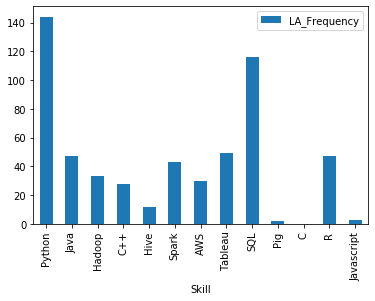

In [26]:
#plot LA frequency bar chart

LA_graph = LA_table.plot(x = 'Skill', y = 'LA_Frequency', kind = 'bar')
LA_graph

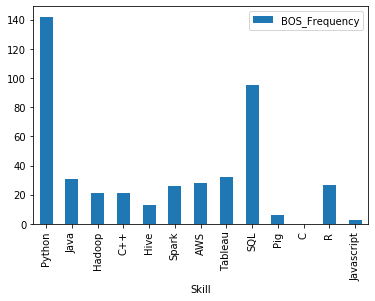

In [27]:
#plot Boston frequency bar chart

BOS_graph = BOS_table.plot(x = 'Skill', y = 'BOS_Frequency', kind = 'bar')


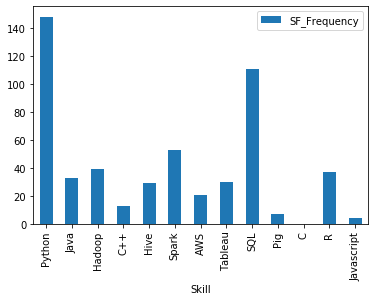

In [28]:
#plot SF frequency bar chart

SF_graph = SF_table.plot(x = 'Skill', y = 'SF_Frequency', kind = 'bar')


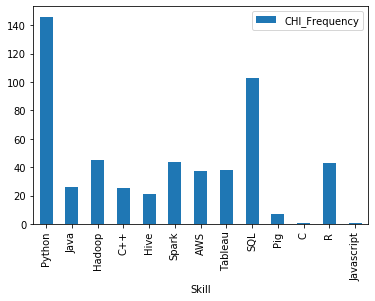

In [29]:
#plot Chicago frequency bar chart
CHI_graph = CHI_table.plot(x = 'Skill', y = 'CHI_Frequency', kind = 'bar')


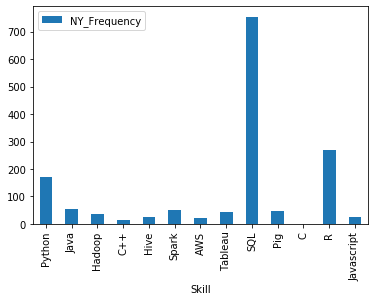

In [30]:
#plot NY frequency bar chart
NY_graph = NY_table.plot(x = 'Skill', y = 'NY_Frequency', kind = 'bar')


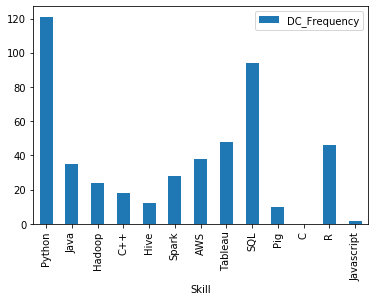

In [31]:
#plot DC frequency table
DC_graph = DC_table.plot(x = 'Skill', y = 'DC_Frequency', kind = 'bar')


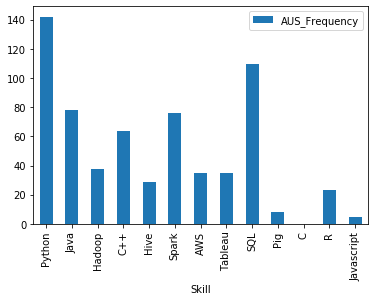

In [32]:
#plot Austin frequency table
AUS_graph = AUS_table.plot(x = 'Skill', y = 'AUS_Frequency', kind = 'bar')


### Final Comparision Chart

In [33]:
FreqOverview = NY_table.merge(AUS_table, on='Skill').merge(BOS_table, on = 'Skill').merge(LA_table, on='Skill').merge(DC_table, on = 'Skill').merge(CHI_table, on = 'Skill').merge(SF_table, on ='Skill')
print(FreqOverview)

         Skill  NY_Frequency  AUS_Frequency  BOS_Frequency  LA_Frequency  \
0       Python           170            142            142           144   
1         Java            56             78             31            47   
2       Hadoop            35             38             21            33   
3          C++            15             64             21            28   
4         Hive            27             29             13            12   
5        Spark            52             76             26            43   
6          AWS            22             35             28            30   
7      Tableau            44             35             32            49   
8          SQL           754            110             95           116   
9          Pig            46              8              6             2   
10           C             1              0              0             0   
11           R           270             23             27            47   
12  Javascri

Text(0, 0.5, 'Frequency')

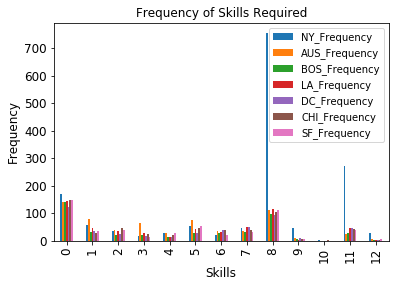

In [34]:
FinalGraph = FreqOverview.plot.bar(title = "Frequency of Skills Required", legend = True, fontsize = 12)
FinalGraph.set_xlabel("Skills", fontsize = 12)
FinalGraph.set_ylabel("Frequency", fontsize = 12)